**Estrazione del dataset**

In [34]:
import zipfile
import os

# Percorso del file zip
zip_file = '/content/liar_dataset.zip'

# Directory di destinazione dove estrarre i file
extract_dir = '/content/liar_dataset'

# Assicurati che la directory di destinazione esista, altrimenti creala
os.makedirs(extract_dir, exist_ok=True)

# Apro il file zip in modalità lettura
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Estraggo tutti i file nella directory di destinazione
    zip_ref.extractall(extract_dir)

print("Files estratti correttamente.")

Files estratti correttamente.


**Conversione dei file in dataframe**

In [37]:
import pandas as pd

# Percorso del file TSV
tsv_test = '/content/liar_dataset/test.tsv'
tsv_train = '/content/liar_dataset/train.tsv'
tsv_valid = '/content/liar_dataset/valid.tsv'

# Caricamento file TSV in un dataframe
df_test = pd.read_csv(tsv_test, sep='\t')
df_train = pd.read_csv(tsv_train, sep='\t')
df_valid = pd.read_csv(tsv_valid, sep='\t')


**Lettura N campioni del dataset**

In [56]:
N=5

print(df_test.head(N))

   11972.json        true  \
0  11685.json       false   
1  11096.json       false   
2   5209.json   half-true   
3   9524.json  pants-fire   
4   5962.json        true   

  Building a wall on the U.S.-Mexico border will take literally years.  \
0  Wisconsin is on pace to double the number of l...                     
1  Says John McCain has done nothing to help the ...                     
2  Suzanne Bonamici supports a plan that will cut...                     
3  When asked by a reporter whether hes at the ce...                     
4  Over the past five years the federal governmen...                     

                                         immigration  \
0                                               jobs   
1                    military,veterans,voting-record   
2  medicare,message-machine-2012,campaign-adverti...   
3  campaign-finance,legal-issues,campaign-adverti...   
4                 federal-budget,pensions,retirement   

                         rick-perry        

Notata la mancanza di nomi alle colonne, vengono assegnati

In [68]:
# Assegnazione nomi colonne
column_names = ['id', 'label', 'statement', 'subject', 'speaker',
                'job_title', 'state_info', 'party_affiliation',
                'barely_true_counts', 'false_counts', 'half_true_counts',
                'mostly_true_counts', 'pants_onfire_counts', 'context']

df_test.columns = column_names
df_train.columns = column_names
df_valid.columns = column_names


**Info su formati dei dati**

In [72]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10239 non-null  object 
 1   label                10239 non-null  object 
 2   statement            10239 non-null  object 
 3   subject              10237 non-null  object 
 4   speaker              10237 non-null  object 
 5   job_title            7341 non-null   object 
 6   state_info           8029 non-null   object 
 7   party_affiliation    10237 non-null  object 
 8   barely_true_counts   10237 non-null  float64
 9   false_counts         10237 non-null  float64
 10  half_true_counts     10237 non-null  float64
 11  mostly_true_counts   10237 non-null  float64
 12  pants_onfire_counts  10237 non-null  float64
 13  context              10137 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB
None


**Dimensioni dei dataset**

In [83]:
print(f'Training set size: {len(df_train)}')
print(f'Test set size: {len(df_test)}')
print(f'Validation set size: {len(df_valid)}')

Training set size: 10239
Test set size: 1266
Validation set size: 1283


**Distribuzione delle label**

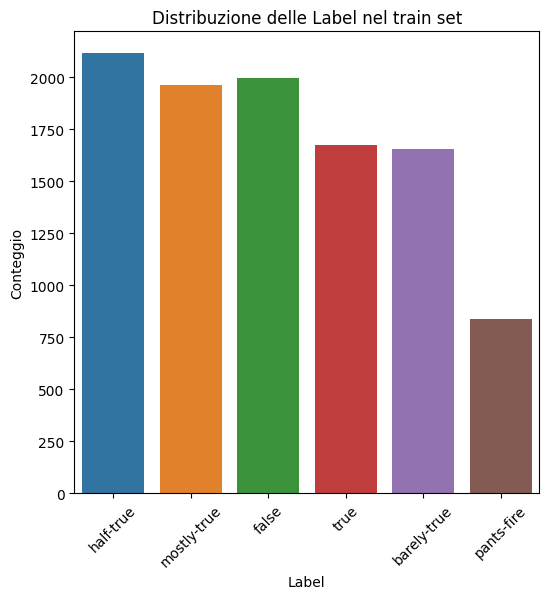

In [73]:
# Plot della distribuzione delle label train
plt.figure(figsize=(6, 6))
sns.countplot(x='label', data=df_train, hue='label')
plt.title('Distribuzione delle Label nel train set')
plt.xlabel('Label')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

**Distribuzione dei N soggetti più comuni**

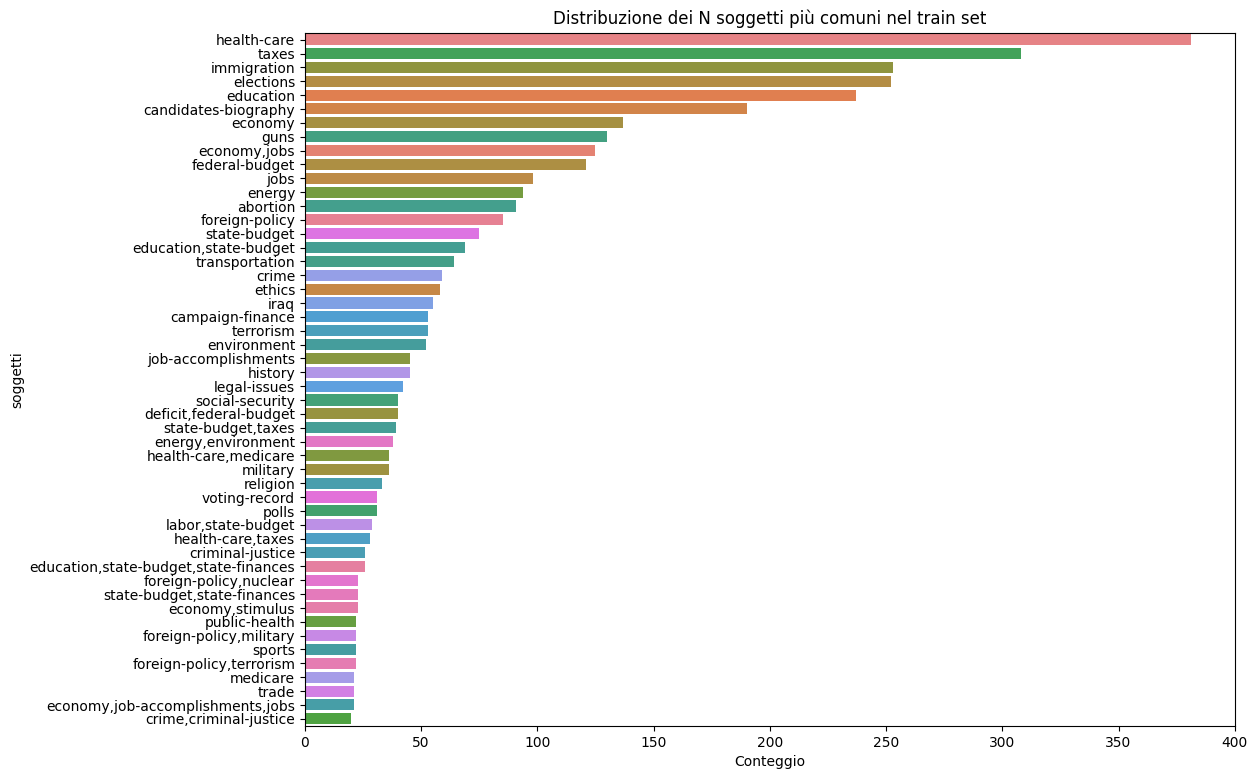

In [95]:
N=50
# Calcola i N subject più comuni
top_N_subjects = df_train['subject'].value_counts().nlargest(N).index
# Filtra il dataframe per includere solo i N subject più comuni
df_top_N_subjects = df_train[df_train['subject'].isin(top_N_subjects)]

# Ordina i subject per conteggio decrescente
order_subjects = df_top_N_subjects['subject'].value_counts().index

# Plot della distribuzione dei subject nel train set con assi invertiti
plt.figure(figsize=(12, 9))
sns.countplot(y='subject', data=df_top_N_subjects, order=order_subjects, hue='subject')
plt.title('Distribuzione dei N soggetti più comuni nel train set')
plt.xlabel('Conteggio')
plt.ylabel('soggetti')
plt.show()


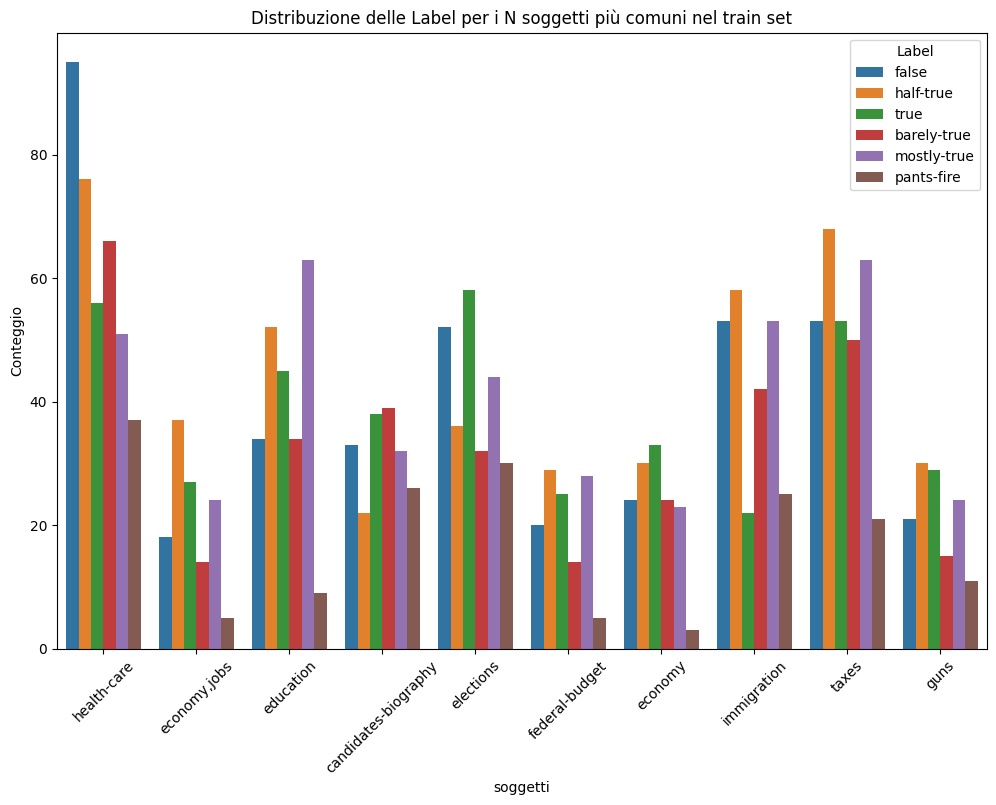

In [96]:
N=10
# Calcola i N subject più comuni
top_N_subjects = df_train['subject'].value_counts().nlargest(N).index
# Filtra il dataframe per includere solo i N subject più comuni
df_top_N_subjects = df_train[df_train['subject'].isin(top_N_subjects)]

# Ordina i subject per conteggio decrescente
order_subjects = df_top_N_subjects['subject'].value_counts().index

# Plot della distribuzione delle label per i N subject più comuni
plt.figure(figsize=(12, 8))
sns.countplot(x='subject', hue='label', data=df_top_N_subjects)
plt.title('Distribuzione delle Label per i N soggetti più comuni nel train set')
plt.xlabel('soggetti')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.legend(title='Label', loc='upper right')
plt.show()